<a href="https://colab.research.google.com/github/TausifAnsari/movie-review-classification/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Building a Model
from tensorflow import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training the model

from keras.datasets import imdb
from keras import losses
from keras import metrics
from keras import optimizers
import numpy as np

# Loading imdb data in training and testing variables, num_words argument keeps top 10000 frequently occuring words in training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimension=10000):
    '''Vectorize functon to vectorize training and testing data'''
    results = np.zeros((len(sequences), dimension))  # Creates a zero matrix of shape (len(sequences),dimensions)
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.                      # Sets specific indices of results[i] to '1'
    return results

x_train = vectorize_sequences(train_data)            # Vectorize training data
x_test = vectorize_sequences(test_data)              # Vectorize testing data

y_train = np.asarray(train_labels).astype('float32') # Vectorize training labels
y_test = np.asarray(test_labels).astype('float32')   # Vectorize testing labels

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]




model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])    # Compiling  model

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) # Training model



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25000 samples, validate on 10000 samples
Epoch 1/20





25000/25000 [==============================] - 8s 325us/step - loss: 0.4611 - binary_accuracy: 0.8298 - val_loss: 0.2953 - val_binary_accuracy: 0.9100
Epoch 2/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2660 - binary_accuracy: 0.9082 - val_loss: 0.2009 - val_binary_accuracy: 0.9382
Epoch 3/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2024 - binary_accuracy: 0.9296 - val_loss: 0.1588 - val_binary_accuracy: 0.9505
Epoch 4/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.1674 - binary_accuracy: 0.9414 - val_loss: 0.1296 - val_binary_accuracy: 0.9623
Epoch 5/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.1419 - binary_accuracy: 0.9505 - val_loss: 0.1333 - val_binary_accuracy: 0.9525
Epoch 6/20
25000/25000 [============

In [0]:
# Decoding the review in English Sentence

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review.replace('?',''))

 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

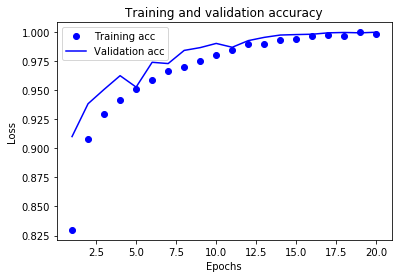

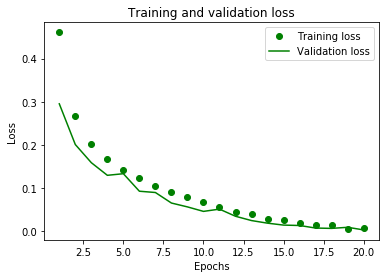

In [0]:
# Plotting binary accuracy, validation binary accuracy, loss, validation loss, 
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# Testing the trained model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Loss :",test_loss)
print("Accuracy :",test_accuracy)

25000/25000 [==============================] - 2s 96us/step
Loss : 0.7937614966785907
Accuracy : 0.852


In [0]:
model.save('imdb_model.h5')

In [60]:
for i in range(1,6):
  print("\nReview : {}".format(i))
  word_index = imdb.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[i]])
  print(decoded_review.replace('?',''))

  pred = model.predict(x_test)
  example = pred[i][0]
  result = round(example)
  if(result == 0):
    print("\nReview is Negative")
  else:
    print("\nReview is positive")



Review : 1
 this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances  the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere  with sexual tension and psychological  it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the  moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual  and desperation be patient  up the atmosphere and pay att